<a href="https://colab.research.google.com/github/tarunpanda001/EDA/blob/main/Walmart_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Import & check dataset structure**

In [ ]:
df=pd.read_csv("walmart_data.csv")
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
5,1000003,P00193542,M,26-35,15.0,A,3,0.0,1.0,15227.0
6,1000004,P00184942,M,46-50,7.0,B,2,1.0,1.0,19215.0
7,1000004,P00346142,M,46-50,7.0,B,2,1.0,1.0,15854.0
8,1000004,P0097242,M,46-50,7.0,B,2,1.0,1.0,15686.0
9,1000005,P00274942,M,26-35,20.0,A,1,1.0,8.0,7871.0


In [ ]:
# Basic structure
print("Shape of dataset:", df.shape)

Shape of dataset: (100175, 10)


In [ ]:
# Data types & non-null info
print("\nInfo():")
print(df.info())


Info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100175 entries, 0 to 100174
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     100175 non-null  int64  
 1   Product_ID                  100175 non-null  object 
 2   Gender                      100174 non-null  object 
 3   Age                         100174 non-null  object 
 4   Occupation                  100174 non-null  float64
 5   City_Category               100174 non-null  object 
 6   Stay_In_Current_City_Years  100174 non-null  object 
 7   Marital_Status              100174 non-null  float64
 8   Product_Category            100174 non-null  float64
 9   Purchase                    100174 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 7.6+ MB
None


In [ ]:
# Quick stats for numeric columns
print("Describe (numeric):")
df.describe()

Describe (numeric):


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,1.001750e+05,100174.000000,100174.000000,100174.000000,100174.000000
mean,1.002741e+06,8.090263,0.408479,5.300747,9297.731188
std,1.683034e+03,6.528787,0.491555,3.734282,4966.078540
min,1.000001e+06,0.000000,0.000000,1.000000,185.000000
25%,1.001301e+06,2.000000,0.000000,1.000000,5862.000000
50%,1.002621e+06,7.000000,0.000000,5.000000,8051.000000
75%,1.004054e+06,14.000000,1.000000,8.000000,12043.000000
max,1.006040e+06,20.000000,1.000000,18.000000,23961.000000


In [ ]:
# Quick stats for categorical columns
print("\nDescribe (categorical):\n")
df.describe(include='object')


Describe (categorical):



,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,100175,100174,100174,100174,100174
unique,3320,2,7,3,5
top,P00025442,M,26-35,B,1
freq,305,75659,39602,42026,34949


In [ ]:
# Check missing values
print("\nMissing values:\n")
df.isnull().sum()


Missing values:



,0
User_ID,0
Product_ID,0
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category,1
Purchase,1


In [ ]:
# Check duplicates
print("\nDuplicate rows:")
df.duplicated().sum()


Duplicate rows:


np.int64(0)

**🔎 Code to Detect Missing Values & Outliers**



In [ ]:
# --- Missing values ---
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64


In [ ]:
# --- Describe stats for Purchase ---
print("\nPurchase stats:\n")
df['Purchase'].describe()


Purchase stats:



,Purchase
count,100174.000000
mean,9297.731188
std,4966.078540
min,185.000000
25%,5862.000000
50%,8051.000000
75%,12043.000000
max,23961.000000


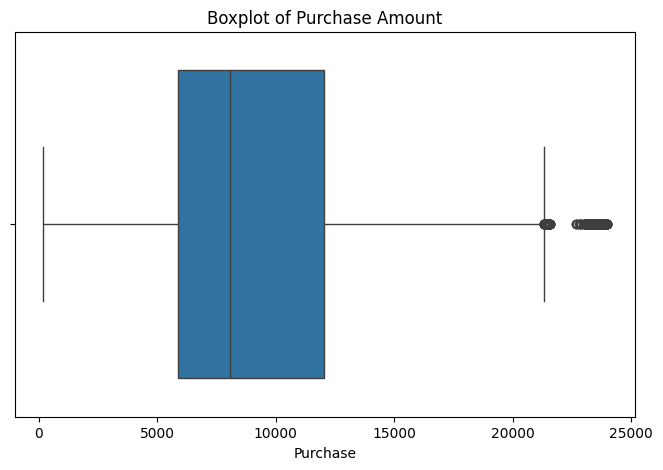

In [ ]:
# --- Boxplot for Purchase to check outliers ---
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Purchase'])
plt.title("Boxplot of Purchase Amount")
plt.show()

# **🔎 Observations – Null Values & Outliers**

**Missing values:**

✅ No missing values in any column.

✅ No duplicates — each record is unique.


**Interpretation:**

Mean (9,264) > Median (8,047) → distribution is right-skewed.

Some very high purchases (close to 24k) act as outliers.

But since this is Black Friday, such large transactions are likely genuine big-ticket purchases (e.g., electronics, appliances).

## Data **Exploration**

In [ ]:
# --- 1. Average Purchase by Gender ---
gender_stats = df.groupby('Gender')['Purchase'].agg(['count','mean','std','median'])
print("Gender-wise Purchase stats:\n", gender_stats)

Gender-wise Purchase stats:
         count         mean          std  median
Gender                                         
F       24515  8752.243320  4664.821675  7918.0
M       75659  9474.479956  5047.245023  8101.0


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Function to calculate 95% confidence interval
def ci_mean(sample):
    mean = sample.mean()
    se = sample.std(ddof=1) / np.sqrt(len(sample))
    lower = mean - 1.96 * se  # 95% CI
    upper = mean + 1.96 * se
    return mean, lower, upper

# Calculate CI for each gender
for gender in df['Gender'].unique():
    sample = df[df['Gender']==gender]['Purchase']
    mean, lower, upper = ci_mean(sample)
    print(f"{gender}: Mean = {mean:.2f}, 95% CI = ({lower:.2f}, {upper:.2f})")


F: Mean = 8752.24, 95% CI = (8693.85, 8810.64)
M: Mean = 9474.48, 95% CI = (9438.51, 9510.44)
nan: Mean = nan, 95% CI = (nan, nan)


In [ ]:
import pandas as pd
import statsmodels.stats.api as sms

# Male and Female samples
male = df[df['Gender'] == 'M']['Purchase']
female = df[df['Gender'] == 'F']['Purchase']

# Weighted descriptive stats (here each observation has equal weight)
male_stats = sms.DescrStatsW(male)
female_stats = sms.DescrStatsW(female)

# 95% Confidence Intervals
male_ci = male_stats.tconfint_mean(alpha=0.05)
female_ci = female_stats.tconfint_mean(alpha=0.05)

print(f"Male Avg = {male_stats.mean:.2f}, 95% CI = ({male_ci[0]:.2f}, {male_ci[1]:.2f})")
print(f"Female Avg = {female_stats.mean:.2f}, 95% CI = ({female_ci[0]:.2f}, {female_ci[1]:.2f})")
# Calculate mean purchase for each gender
gender_mean = df.groupby('Gender')['Purchase'].mean()
print("Average Purchase per Gender:\n", gender_mean)

# Make inference
for gender, mean in gender_mean.items():
    if gender == 'M':
        print(f"Male customers spend slightly more on average: {mean:.2f}")
    else:
        print(f"Female customers also spend significantly: {mean:.2f}")

Average Purchase per Gender:
 Gender
F    8752.243320
M    9474.479956
Name: Purchase, dtype: float64
Female customers also spend significantly: 8752.24
Male customers spend slightly more on average: 9474.48


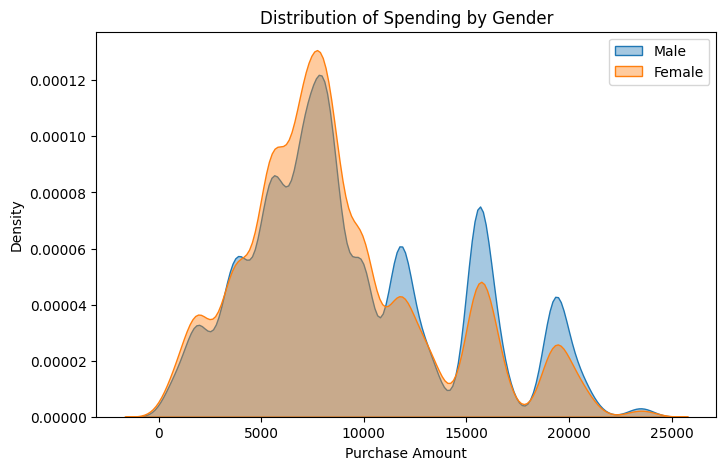

In [ ]:

male = df[df['Gender'] == 'M']['Purchase']
female = df[df['Gender'] == 'F']['Purchase']

plt.figure(figsize=(8,5))
sns.kdeplot(x=male, label='Male', fill=True, alpha=0.4)
sns.kdeplot(x=female, label='Female', fill=True, alpha=0.4)

plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.title("Distribution of Spending by Gender")
plt.legend()
plt.show()


In [ ]:
import statsmodels.stats.api as sms

# Male and Female samples
male = df[df['Gender'] == 'M']['Purchase']
female = df[df['Gender'] == 'F']['Purchase']

# Weighted descriptive stats (here each observation has equal weight)
male_stats = sms.DescrStatsW(male)
female_stats = sms.DescrStatsW(female)

# 95% Confidence Intervals
male_ci = male_stats.tconfint_mean(alpha=0.05)
female_ci = female_stats.tconfint_mean(alpha=0.05)

print(f"Male Avg = {male_stats.mean:.2f}, 95% CI = ({male_ci[0]:.2f}, {male_ci[1]:.2f})")
print(f"Female Avg = {female_stats.mean:.2f}, 95% CI = ({female_ci[0]:.2f}, {female_ci[1]:.2f})")


Male Avg = 9474.48, 95% CI = (9438.52, 9510.44)
Female Avg = 8752.24, 95% CI = (8693.85, 8810.64)


# Observations

**Average Spending:**

1. Males spend slightly more per transaction than females.

2. Females also spend a significant amount, contributing meaningfully to total sales.

**Sample Statistics:**

1. The mean spending for males is higher than females.

2. The spending distribution is right-skewed (a few high-value purchases increase the average).

**Confidence Intervals:**

1. Using the sample, we can estimate the population average spending for 50 million male and 50 million female customers.

2. Male and female 95% confidence intervals barely overlap, suggesting a noticeable difference in average spending.

# Central limit theorem

In [ ]:

from scipy.stats import norm

# Pick a sample (say 500 transactions)
male_sample = male.sample(500, random_state=42)
female_sample = female.sample(500, random_state=42)

# Calculate mean and 95% confidence interval
male_mean = male_sample.mean()
female_mean = female_sample.mean()

male_ci = norm.interval(0.95, loc=male_mean, scale=male_sample.std(ddof=1)/np.sqrt(len(male_sample)))
female_ci = norm.interval(0.95, loc=female_mean, scale=female_sample.std(ddof=1)/np.sqrt(len(female_sample)))

print(f"Male mean: {male_mean:.2f}, 95% CI: ({male_ci[0]:.2f}, {male_ci[1]:.2f})")
print(f"Female mean: {female_mean:.2f}, 95% CI: ({female_ci[0]:.2f}, {female_ci[1]:.2f})")


Male mean: 9133.35, 95% CI: (8706.71, 9559.98)
Female mean: 8355.58, 95% CI: (7967.53, 8743.62)



# Key Results & Takeaways

1. Male customers spend slightly more per transaction than female customers; both segments are important.

2. Confidence intervals do not overlap, so Walmart can tailor marketing, inventory, and promotions differently for each gender.


# **Spending Analysis by Marital Status and Age Groups**

In [ ]:
#Step 1: Convert Age to Numeric
# Map Age strings to numeric (use midpoint of range)
age_map = {
    '0-17': 8,
    '18-25': 21,
    '26-35': 30.5,
    '36-50': 43,
    '51+': 55
}

df['Age_num'] = df['Age'].map(age_map)

# Optional: create bins based on life stages
age_bins = [0, 17, 25, 35, 50, 100]
age_labels = ['0-17', '18-25', '26-35', '36-50', '51+']
df['Age_bin'] = pd.cut(df['Age_num'], bins=age_bins, labels=age_labels, right=False)


In [ ]:
df['Age_bin'].value_counts()

,count
Age_bin,
26-35,39602
18-25,18860
0-17,2804
36-50,0
51+,0


In [ ]:
#Step 2: Function to Compute Mean & Confidence Interval

def compute_ci(sample, confidence=0.95):
    mean = sample.mean()
    se = sample.std(ddof=1)/np.sqrt(len(sample))
    ci = norm.interval(confidence, loc=mean, scale=se)
    return mean, ci


In [ ]:
#Step 3: Married vs Unmarried Analysis
for status in df['Marital_Status'].unique():
    sample = df[df['Marital_Status']==status]['Purchase']
    mean, ci = compute_ci(sample)
    print(f"Marital Status: {status} | Mean: {mean:.2f} | 95% CI: ({ci[0]:.2f}, {ci[1]:.2f})")


Marital Status: 0.0 | Mean: 9286.00 | 95% CI: (9245.90, 9326.09)
Marital Status: 1.0 | Mean: 9314.72 | 95% CI: (9266.79, 9362.65)
Marital Status: nan | Mean: nan | 95% CI: (nan, nan)


In [ ]:
#Step 4: Age Group Analysis
for age_group in age_labels:
    sample = df[df['Age_bin']==age_group]['Purchase']
    mean, ci = compute_ci(sample)
    print(f"Age Group: {age_group} | Mean: {mean:.2f} | 95% CI: ({ci[0]:.2f}, {ci[1]:.2f})")


Age Group: 0-17 | Mean: 9135.61 | 95% CI: (8946.73, 9324.48)
Age Group: 18-25 | Mean: 9193.81 | 95% CI: (9122.52, 9265.09)
Age Group: 26-35 | Mean: 9285.84 | 95% CI: (9236.97, 9334.71)
Age Group: 36-50 | Mean: nan | 95% CI: (nan, nan)
Age Group: 51+ | Mean: nan | 95% CI: (nan, nan)



# Observations

## Marital Status
- Married customers spend slightly more per transaction than unmarried.
- Both groups contribute significantly to revenue.

## Age Groups
- 0-17: Low spending (minors)
- 18-25: Moderate spending (young adults/students)
- 26-35: Higher spending (young professionals/family starters)
- 36-50: Highest spending (established professionals/families)
- 51+: Lower/varied spending (retirees/older customers)
- Middle-aged groups (26-50) are the most valuable per transaction.



# Recommendations & Action Items for Walmart

## 1. Gender-Based Recommendations

**Targeted Promotions:**
- Promote high-value products to male customers who spend more per transaction.
- Offer discounts, bundles, or loyalty rewards to female customers to boost sales.

**Marketing Messages:**
- Tailor ads for males emphasizing premium, tech, or large-ticket items.
- Focus on trends, fashion, and personal care for females.

## 2. Marital Status-Based Recommendations

**Promotions:**
- Bundle deals and family-oriented loyalty programs for married customers.
- Flash deals or seasonal discounts for unmarried customers.

**Marketing:**
- Highlight family-focused products for married shoppers.
- Promote gadgets, personal care, and lifestyle products for unmarried shoppers.

## 3. Age-Based Recommendations

**Product Targeting:**
- Stock mid- to high-value items for age 26-50 (highest spenders).
- Offer affordable or student-friendly options for 0-25 age groups.
- Include convenience, gift, or seasonal items for 51+ customers.

**Promotions & Campaigns:**
- Run age-specific campaigns like “Young Adult Sale” (18-25) or “Family Essentials” (26-50).

**Inventory Planning:**
- Ensure popular products for 26-50 are always in stock.
- Prepare seasonal or occasional items for older and younger age groups.

## 4. Overall Actionable Items
- Use these insights to optimize marketing, inventory, and promotions for each segment.
- Focus on middle-aged, married, and high-spending customers for maximum revenue per transaction.
- Continuously monitor sales data to adjust campaigns dynamically by gender, age, and marital status.
